# Classification of Mushrooms
Safe to eat or deadly poison?

## Dataset and research question

With this dataset I would like to be able to make a model that can predict whether or not a mushroom is safe to eat. This should be determined using as little features as possible. Because this dataset has 22 features I would also like to find out if features are unnecessary. 

Research question: Which features are needed to determine wheater or not a mushroom is safe to eat?

To be able to achieve this, all features need to be converted to numerical values. Then I would like to find out which features are less relevant. After that I want to try out different machine learning algorithms and find out which one is best fitted for the job.

Prediction: I expect that with this dataset a model could be made that can predict whether or not a mushroom is safe to eat with high accuracy.

## Dataset description

Dataset name: Mushroom classification

Url: https://www.kaggle.com/uciml/mushroom-classification

Domain of the dataset: food/ nature

Attribute Information: (classes: edible=e, poisonous=p)

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 

- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

- bruises: bruises=t,no=f

- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

- gill-attachment: attached=a,descending=d,free=f,notched=n

- gill-spacing: close=c,crowded=w,distant=d

- gill-size: broad=b,narrow=n

- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

- stalk-shape: enlarging=e,tapering=t

- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- veil-type: partial=p,universal=u

- veil-color: brown=n,orange=o,white=w,yellow=y

- ring-number: none=n,one=o,two=t

- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
    
At first glance the data does not have to be cleaned, but I will investigate this further using the pandas library. Only thing that I expect to need to do is to convert all values to numerical ones.


### Used information

- https://www.geeksforgeeks.org/confusion-matrix-machine-learning/
- https://scikit-learn.org/stable/modules/feature_selection.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

## Importing the data

The file that was downloaded from Kaggle was a comma separated csv file. This means that using the default read_csv method from pandas will we enough to load the data into memory.

In [55]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

mush = pd.read_csv('mushrooms.csv')

In [56]:
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Cleaning the data

Looking at the data that was retrieved from Kaggle a few things need to be done before it's ready to be worked with. Since all the values is the dataset are letters these need to be changed to numerical values. The letters will be converted to their unicode point and the classes to a 0 or 1 dependig wheter or not a mushroom is edible. Edible will be marked as 1 (positive) and poisonous will be marked as 0 (negative). After that the values in the dataframe will be changed to numerical ones as they otherwise will stay as an object, which would give errors when visualizing and training.

In [57]:
for c in mush.columns: 
    mush[c] = [ord(x) for x in mush[c]]
    mush[c] = pd.to_numeric(mush[c])

class_dict = {112:0, 101:1}
mush = mush.replace({"class": class_dict})

In [58]:
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,120,115,110,116,112,102,99,110,107,...,115,119,119,112,119,111,112,107,115,117
1,1,120,115,121,116,97,102,99,98,107,...,115,119,119,112,119,111,112,110,110,103
2,1,98,115,119,116,108,102,99,98,110,...,115,119,119,112,119,111,112,110,110,109
3,0,120,121,119,116,112,102,99,110,110,...,115,119,119,112,119,111,112,107,115,117
4,1,120,115,103,102,110,102,119,98,107,...,115,119,119,112,119,111,101,110,97,103


All the data is now clean. Now the dataset will be split in two parts. One part will contain the classes and the other part will contain the features. This is necessary to be able to use the data for machine learning.

In [59]:
X = mush.loc[:, mush.columns != 'class']
y = mush['class']

## Exploration of the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002209820CD30>,
      dtype=object)

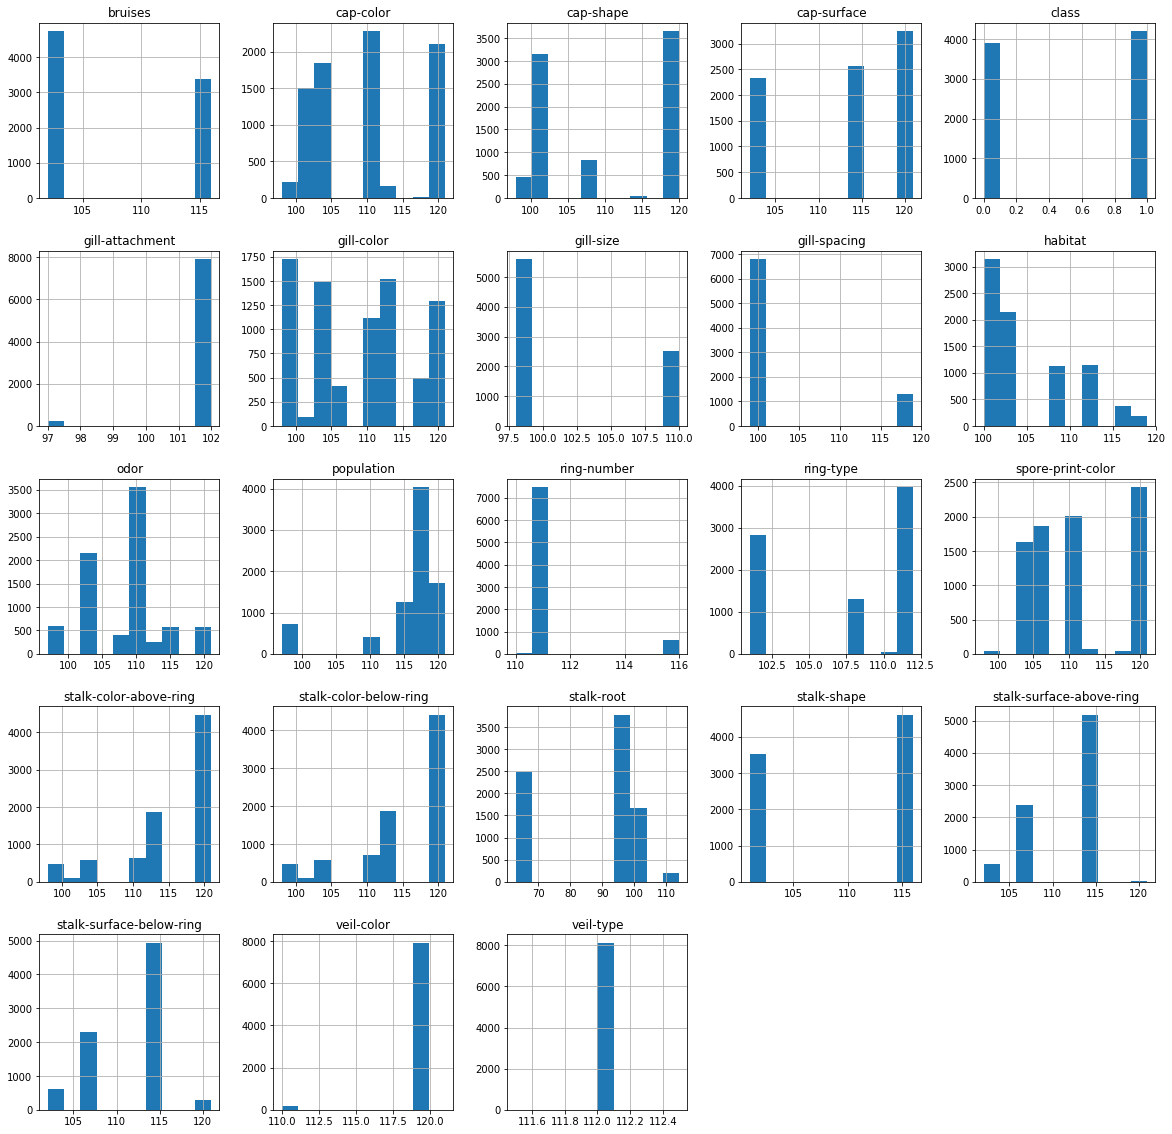

In [60]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# mush['odor'].plot.hist()
mush.hist(figsize=(20,20))

In de above graph histograms of all features and the class are plotted. Looking at a few histograms like veil-color, veil-type and ring-number the conclusion can be made that they are unbalanced. Meaning that I expect that they will not tell alot about wether or not a mushroom is edible. Because by far the most mushrooms edible or not are in te same category of these specific features.

## Best features

Because I would like to find out if a mushroom is edible base on as little features as possible, the first logical step would be to find a way to find the best features given a feature amount. After looking for a way to do this with sklearn I found the SelectKBest algorithm that does exactly what I was looking for. 

In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

k_best = SelectKBest(chi2, k=10)
X_new = k_best.fit_transform(X, y)
X_new.shape
mask = k_best.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, list(X)):
    if bool:
        new_features.append(feature)
        
print(new_features)

['cap-surface', 'bruises', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'ring-type', 'population']


The script above is the way to use the SelectKBest algorithm to find out what the best features are. An example is given where the best 10 features are shown, these are printed above. According to the SelectKBest algorithm these are the best 10 features that correlate the most with the two classes of the dataset (edible and poisonous)

## Plotly setup

To be able to use plotly to plot graphs some initiation code is needed. This initiation code is made in this section below.

In [62]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

## Machine learning

In this section first all scripts and methods are made to be able to use the machine learning algorithms more easily. The exact function of a method will be discussed above each method.

After all the facilitation script the real machine learning algorithms are discussed.

In [63]:
import plotly.graph_objs as go

# Converts accoracy, recall and precision arrays to a figure that can be plotted using plotly.
def make_plot_data(amount_features, accuracy, recall, precision):
    data = [
        go.Scatter(x = amount_features, y = accuracy, name='accuracy'),
        go.Scatter(x = amount_features, y = recall, name='recall'),
        go.Scatter(x = amount_features, y = precision, name='precision')
    ]
    layout = go.Layout(
        yaxis=dict(
            rangemode='tozero',
            autorange=True
        )
    )
    
    return go.Figure(data=data, layout=layout)

In [64]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# Goes through different amount of features until the given maximum is reached. 
# After deciding the metrics of the trained model these metrics are added to an array,
# then they are converted to a plotly figure to be able to make a graph.
def test_different_features(max_features, clf, X, y, scale=True, clustering=False, flip_labels=False):
    amount_features, accuracy, recall, precision = [], [], [], []
    
    for i in range(0, max_features):
        am, ac, rc, pc = test_amount_features(i + 1, clf, X, y, scale, clustering, flip_labels)
        
        amount_features.append(am)
        accuracy.append(ac)
        recall.append(rc)
        precision.append(pc)
        
    return make_plot_data(amount_features, accuracy, recall, precision)

In [65]:
# Trains a classifier with the best features based on a given amount of features.
#
# First the best features are selected and the dataset is changed to only contain these features.
# Then the option is given to scale the dataset.
# After scaling, the dataset is splitted into a train and test set.
# After that the classifier is trained and the predictions with the test data are made.
# Finally the predicted labels are used together with the actual labels to determine some
# metrics like accuracy, recall and precision. These metrics are then returned.
def test_amount_features(amount_features, clf, X, y, scale, clustering, flip_labels):
    k_best = SelectKBest(chi2, k=amount_features)
    X_new = k_best.fit_transform(X, y)
    
    if scale:
        X_new = preprocessing.scale(X_new)
        
    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.33, random_state=33)
    
    if not clustering:
        clf = clf.fit(X_train, y_train)
    else:
        clf.fit(X_new)
    
    if not clustering:
        y_pred = clf.predict(X_test)
    else:
        y_pred = clf.labels_
        
    if flip_labels and clustering and accuracy_score(y, y_pred) < 0.5:
        y_pred = np.asarray(y_pred)
        y_pred = 1-y_pred
    elif flip_labels and not clustering and accuracy_score(y_test, y_pred) < 0.5:
        y_pred = np.asarray(y_pred)
        y_pred = 1-y_pred    
        
    
    if not clustering:
        return amount_features, accuracy_score(y_test, y_pred), recall_score(y_test, y_pred), precision_score(y_test, y_pred)
    else:
        return amount_features, accuracy_score(y, y_pred), recall_score(y, y_pred), precision_score(y, y_pred)

In [66]:
# Trains a classifier with the best features based on a given amount of features using
# cross validation as a way to split the test and train data. This can be used as an indication
# to determine how stable the accuracy and other metrics are.
#
# First the best features are selected and the dataset is changed to only contain these features.
# Then the option is given to scale the dataset.
# After that the new train and test sets created by KFold are iterated and used to train models.
# The metrics of these models are the calculated and collected in arrays.
# These arrays with the metrics values are then used to make a plotly figure that is then returned.
def test_amount_features_kfold(amount_features, clf, X, y, scale=True):
    k_amount, accuracy, recall, precision = [], [], [], []
    
    k_best = SelectKBest(chi2, k=amount_features)
    X_new = k_best.fit_transform(X, y)
    
    if scale:
        X_new = preprocessing.scale(X_new)
        
    kf = KFold(n_splits=5, shuffle=True, random_state=33)
    
    for k, (train, test) in enumerate(kf.split(X_new, y)):
        clf.fit(X_new[train], y[train])
        y_pred = clf.predict(X_new[test])
        
        k_amount.append(k)
        accuracy.append(accuracy_score(y[test], y_pred))
        recall.append(recall_score(y[test], y_pred))
        precision.append(precision_score(y[test], y_pred))
    
    return make_plot_data(k_amount, accuracy, recall, precision)

### Decision Tree

Usage: https://scikit-learn.org/stable/modules/tree.html

The the decision tree alorithm compartmentalizes the classes based on the different features and makes a model (decision tree) with the best decicsions to determine the classes. Bacause the mushroom dataset contains a limited amount of values (categories) for every feature I thought this algorithm would perform reasonably well.

In [67]:
from sklearn import tree

clf_tree = tree.DecisionTreeClassifier()

iplot(test_different_features(22, clf_tree, X, y), filename='Decision tree metrics')

Looking at the results above the decision tree seems very effective at around 10 or 11 features. When looking at the other algorithms this one seems the most effective. I believe it's because of the power a decision tree has with categorical features.

To verify that the algorithm is as effective as it is with other test and train datasets cross validation is used. In the graph below it is visible that the same metrics are achieved with different test and train chunks using only 10 features of the dataset.

In [68]:
iplot(test_amount_features_kfold(10, clf_tree, X, y), filename='Decision tree metrics KFold')

In [69]:
import graphviz 
dot_data = tree.export_graphviz(clf_tree, out_file=None) 

graph = graphviz.Source(dot_data) 
graph.render("mushrooms") 

dot_data = tree.export_graphviz(clf_tree, out_file=None, 
                     feature_names=new_features,  
                     class_names=['edible', 'poisonous'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  

### Support Vector Machines

Usage: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

The SVM algorithm calcutales a hyperplane based on features to separate the different classes. 

In [70]:
from sklearn import svm

clf_svm = svm.SVC(gamma='scale')
iplot(test_different_features(22, clf_svm, X, y), filename='Support Vector Machines metrics')

Looking at the graph above SVM is also a very effective algorithm, but needs more features to be able to be completely certain a mushroom is edible.

At around 18 features the algorithm can be 

In [71]:
iplot(test_amount_features_kfold(18, clf_svm, X, y), filename='Support Vector Machines metrics KFold')

### Gaussian Naive Bayes

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

In [72]:
from sklearn.naive_bayes import GaussianNB

clf_gaus = GaussianNB()
iplot(test_different_features(22, clf_gaus, X, y), filename='Gaussian Naive Bayes metrics')

In [73]:
iplot(test_amount_features_kfold(6, clf_gaus, X, y), filename='Gaussian Naive Bayes metrics KFold')

### Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [74]:
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(n_estimators=100, random_state=33)
iplot(test_different_features(22, clf_forest, X, y), filename='Random Forest metrics')

In [75]:
iplot(test_amount_features_kfold(10, clf_forest, X, y), filename='Random Forest metrics KFold')

### Neural Network

https://scikit-learn.org/stable/modules/neural_networks_supervised.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [76]:
from sklearn.neural_network import MLPClassifier
import warnings

clf_nn = MLPClassifier(solver='adam', 
                    alpha=0.001, 
                    learning_rate_init = 0.001,
                    hidden_layer_sizes=(200, 140, 40), 
                    random_state=33)

iplot(test_different_features(22, clf_nn, X, y), filename='Neural Network metrics')

In [77]:
iplot(test_amount_features_kfold(10, clf_nn, X, y), filename='Neural Network metrics KFold')

### KMeans clustering

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [78]:
from sklearn.cluster import KMeans

clf_kmeans = KMeans(n_clusters=2, random_state=33, n_jobs=-1)

iplot(test_different_features(22, clf_kmeans, X, y, scale=True, 
                                 clustering=False, flip_labels=True), 
         filename='Kmeans clustering metrics')

### Agglomerative clustering

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [79]:
from sklearn.cluster import AgglomerativeClustering
clf_agl = AgglomerativeClustering(n_clusters=2)
iplot(test_different_features(22, clf_agl, X, y, 
                                 scale=True, clustering=True, flip_labels=True), 
         filename='Agglomerative clustering metrics')